In [1]:
######################Prediction of indicators/diagnosis of cervical cancer####################################

####Librerías

import numpy as np
import pandas as pd
from mpl_toolkits.axes_grid1 import AxesGrid
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
#estimator
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
#model metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score


In [2]:
##IMPORT DATA FROM https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29
#####The dataset was collected at 'Hospital Universitario de Caracas' in Caracas, Venezuela. The dataset comprises demographic information, habits, and historic medical records of 858 patients. 
#####Several patients decided not to answer some of the questions because of privacy concerns (missing values).
DataFrame = pd.read_csv(r"C:\XTOL\Capstone project\risk_factors_cervical_cancer.csv")

In [3]:
####Conocer el dataset
pd.options.display.max_columns = None
pd.options.display.max_rows = None
DataFrame.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [4]:
DataFrame.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [5]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                858 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null object
Hormonal Contraceptives (years)       858 non-null object
IUD                                   858 non-null object
IUD (years)                           858 non-null object
STDs                                  858 non-null object
STDs (number)                         858 non-null object
STDs:condylomatosis                   858 non-null object
STDs:cervical condylomatosis          858 non-null object
STDs:vaginal condylomatosi

In [6]:
#Validar datos nulos
DataFrame.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [7]:
DataFrame['STDs'].value_counts()

0.0    674
?      105
1.0     79
Name: STDs, dtype: int64

In [8]:
#########################Preprocesamiento de Datos#############################################
### Como encontramos valores incorrectos vamos a reemplazar la '?' por NaN y actualizar el tipo de datos
df_na = DataFrame.replace('?', np.nan)
df_na = df_na.infer_objects()

In [9]:
df_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null object
First sexual intercourse              851 non-null object
Num of pregnancies                    802 non-null object
Smokes                                845 non-null object
Smokes (years)                        845 non-null object
Smokes (packs/year)                   845 non-null object
Hormonal Contraceptives               750 non-null object
Hormonal Contraceptives (years)       750 non-null object
IUD                                   741 non-null object
IUD (years)                           741 non-null object
STDs                                  753 non-null object
STDs (number)                         753 non-null object
STDs:condylomatosis                   753 non-null object
STDs:cervical condylomatosis          753 non-null object
STDs:vaginal condylomatosi

In [10]:
df_na.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

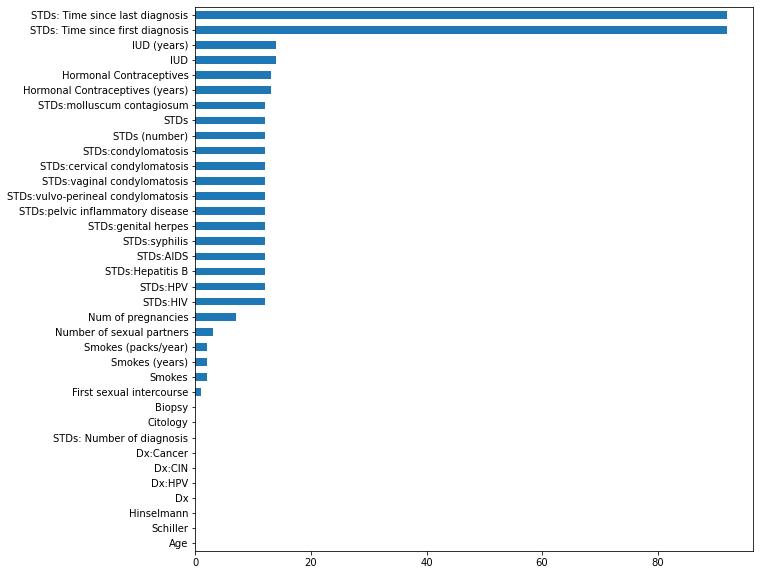

In [11]:
##Ver el porcentaje de valores nulos de cada característica
plt.figure(figsize=(10,10))
np.round(df_na.isnull().sum()/df_na.shape[0]*100).sort_values().plot(kind='barh')

In [12]:
##Podemos ver que las características 'STDs: Time since last diagnosis, 'STDs: Time since first diagnosis' 
##tienen más del 80% de valores nulos. Por lo tanto las eliminaremos
df_na=df_na.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],axis=1)

In [13]:
## existen variables que tienen pocas caracterísiticas nulas por lo tanto
## eliminamos esos registros faltantes
df_na = df_na.dropna(axis=0)

In [14]:
##Verificamos que no tengamos valores nulos
df_na.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [15]:
df_na.shape

(668, 34)

In [16]:
#################################EDA######################
##Los Objetos los convertimos primero a float y luego a int
data_clean=df_na
data_clean = data_clean.astype({'STDs:molluscum contagiosum':'float64','STDs:cervical condylomatosis':'float64','IUD (years)':'float64','Hormonal Contraceptives (years)':'float64','Smokes (packs/year)':'float64','Smokes (years)':'float64',
                                'STDs:AIDS':'float64','STDs:cervical condylomatosis':'float64','Number of sexual partners': 'float64','First sexual intercourse':'float64','Num of pregnancies':'float64', 'Smokes':'float64', 'Smokes (years)':'float64', 'Smokes (packs/year)':'float64',
       'Hormonal Contraceptives':'float64', 'Hormonal Contraceptives (years)':'float64', 'IUD':'float64',
       'IUD (years)':'float64', 'STDs':'float64', 'STDs (number)':'float64', 'STDs:condylomatosis':'float64',
       'STDs:vaginal condylomatosis':'float64', 'STDs:vulvo-perineal condylomatosis':'float64',
       'STDs:syphilis':'float64', 'STDs:pelvic inflammatory disease':'float64',
       'STDs:genital herpes':'float64', 'STDs:molluscum contagiosum':'float64', 'STDs:HIV':'float64',
       'STDs:Hepatitis B':'float64', 'STDs:HPV':'float64', 'STDs: Number of diagnosis':'float64',
       'Dx:Cancer':'float64', 'Dx:CIN':'float64', 'Dx:HPV':'float64', 'Dx':'float64', 'Hinselmann':'float64', 'Schiller':'float64',
       'Citology':'float64', 'Biopsy':'float64'},copy=False)
data_clean = data_clean.astype({'STDs:molluscum contagiosum':'int64','STDs:cervical condylomatosis':'int64','IUD (years)':'int64','Hormonal Contraceptives (years)':'int64','Smokes (packs/year)':'int64','Smokes (years)':'int64','STDs:AIDS':'int64',
        'Smokes (years)':'int64','Number of sexual partners': 'int64','First sexual intercourse':'int64','Num of pregnancies':'int64', 'Smokes':'int64',
       'Hormonal Contraceptives':'int64', 'IUD':'int64',
       'STDs':'int64', 'STDs (number)':'int64', 'STDs:condylomatosis':'int64',
       'STDs:vaginal condylomatosis':'int64', 'STDs:vulvo-perineal condylomatosis':'int64',
       'STDs:syphilis':'int64', 'STDs:pelvic inflammatory disease':'int64',
       'STDs:genital herpes':'int64', 'STDs:molluscum contagiosum':'int64', 'STDs:HIV':'int64',
       'STDs:Hepatitis B':'int64', 'STDs:HPV':'int64', 'STDs: Number of diagnosis':'int64',
       'Dx:Cancer':'int64', 'Dx:CIN':'int64', 'Dx:HPV':'int64', 'Dx':'int64', 'Hinselmann':'int64', 'Schiller':'int64',
       'Citology':'int64', 'Biopsy':'int64'},copy=False)

In [17]:
#1. El objetivo es predecir la probabildiad de cancer y debemos asumir que las pruebas"biopsy", "hinselman", "Schiller" and 
##"citology"  si dan positivo el paciente tiene cáncer.
data_clean['Cancer']=np.where(df_na.apply(lambda row: row.Hinselmann + row.Schiller + row.Citology + row.Biopsy, axis=1)>0,1,0)


In [18]:
data_clean = data_clean.drop_duplicates()

In [19]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649 entries, 0 to 857
Data columns (total 35 columns):
Age                                   649 non-null int64
Number of sexual partners             649 non-null int64
First sexual intercourse              649 non-null int64
Num of pregnancies                    649 non-null int64
Smokes                                649 non-null int64
Smokes (years)                        649 non-null int64
Smokes (packs/year)                   649 non-null int64
Hormonal Contraceptives               649 non-null int64
Hormonal Contraceptives (years)       649 non-null int64
IUD                                   649 non-null int64
IUD (years)                           649 non-null int64
STDs                                  649 non-null int64
STDs (number)                         649 non-null int64
STDs:condylomatosis                   649 non-null int64
STDs:cervical condylomatosis          649 non-null int64
STDs:vaginal condylomatosis           64

In [20]:
data_clean.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,Cancer
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.0,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.0,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,27.505393,2.550077,17.177196,2.352851,0.147920,1.265023,0.431433,0.654854,2.280431,0.115562,0.539291,0.100154,0.171032,0.057011,0.0,0.006163,0.055470,0.023112,0.001541,0.001541,0.001541,0.0,0.020031,0.001541,0.003082,0.095532,0.026194,0.004622,0.024653,0.024653,0.046225,0.095532,0.058552,0.067797,0.130971
std,8.698857,1.651142,2.864379,1.473111,0.355294,4.249985,2.355450,0.475783,3.792244,0.319946,2.028823,0.300437,0.558348,0.232042,0.0,0.078325,0.229072,0.150377,0.039253,0.039253,0.039253,0.0,0.140214,0.039253,0.055470,0.314459,0.159835,0.067884,0.155186,0.155186,0.210134,0.294175,0.234965,0.251590,0.337629
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,22.000000,1.000000,19.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


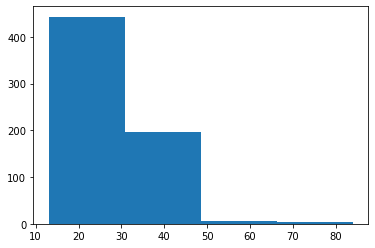

In [21]:
###agrupamos las edades

plt.hist(data_clean['Age'],bins=4)
plt.show()

In [22]:
bin_labels = ['10-30', '30-50', '50-70', '70-90']
data_clean["CAT_AGE"] = pd.qcut(data_clean["Age"], 4,  labels=bin_labels)

In [23]:
print(data_clean.groupby("CAT_AGE").size())

CAT_AGE
10-30    186
30-50    147
50-70    168
70-90    148
dtype: int64


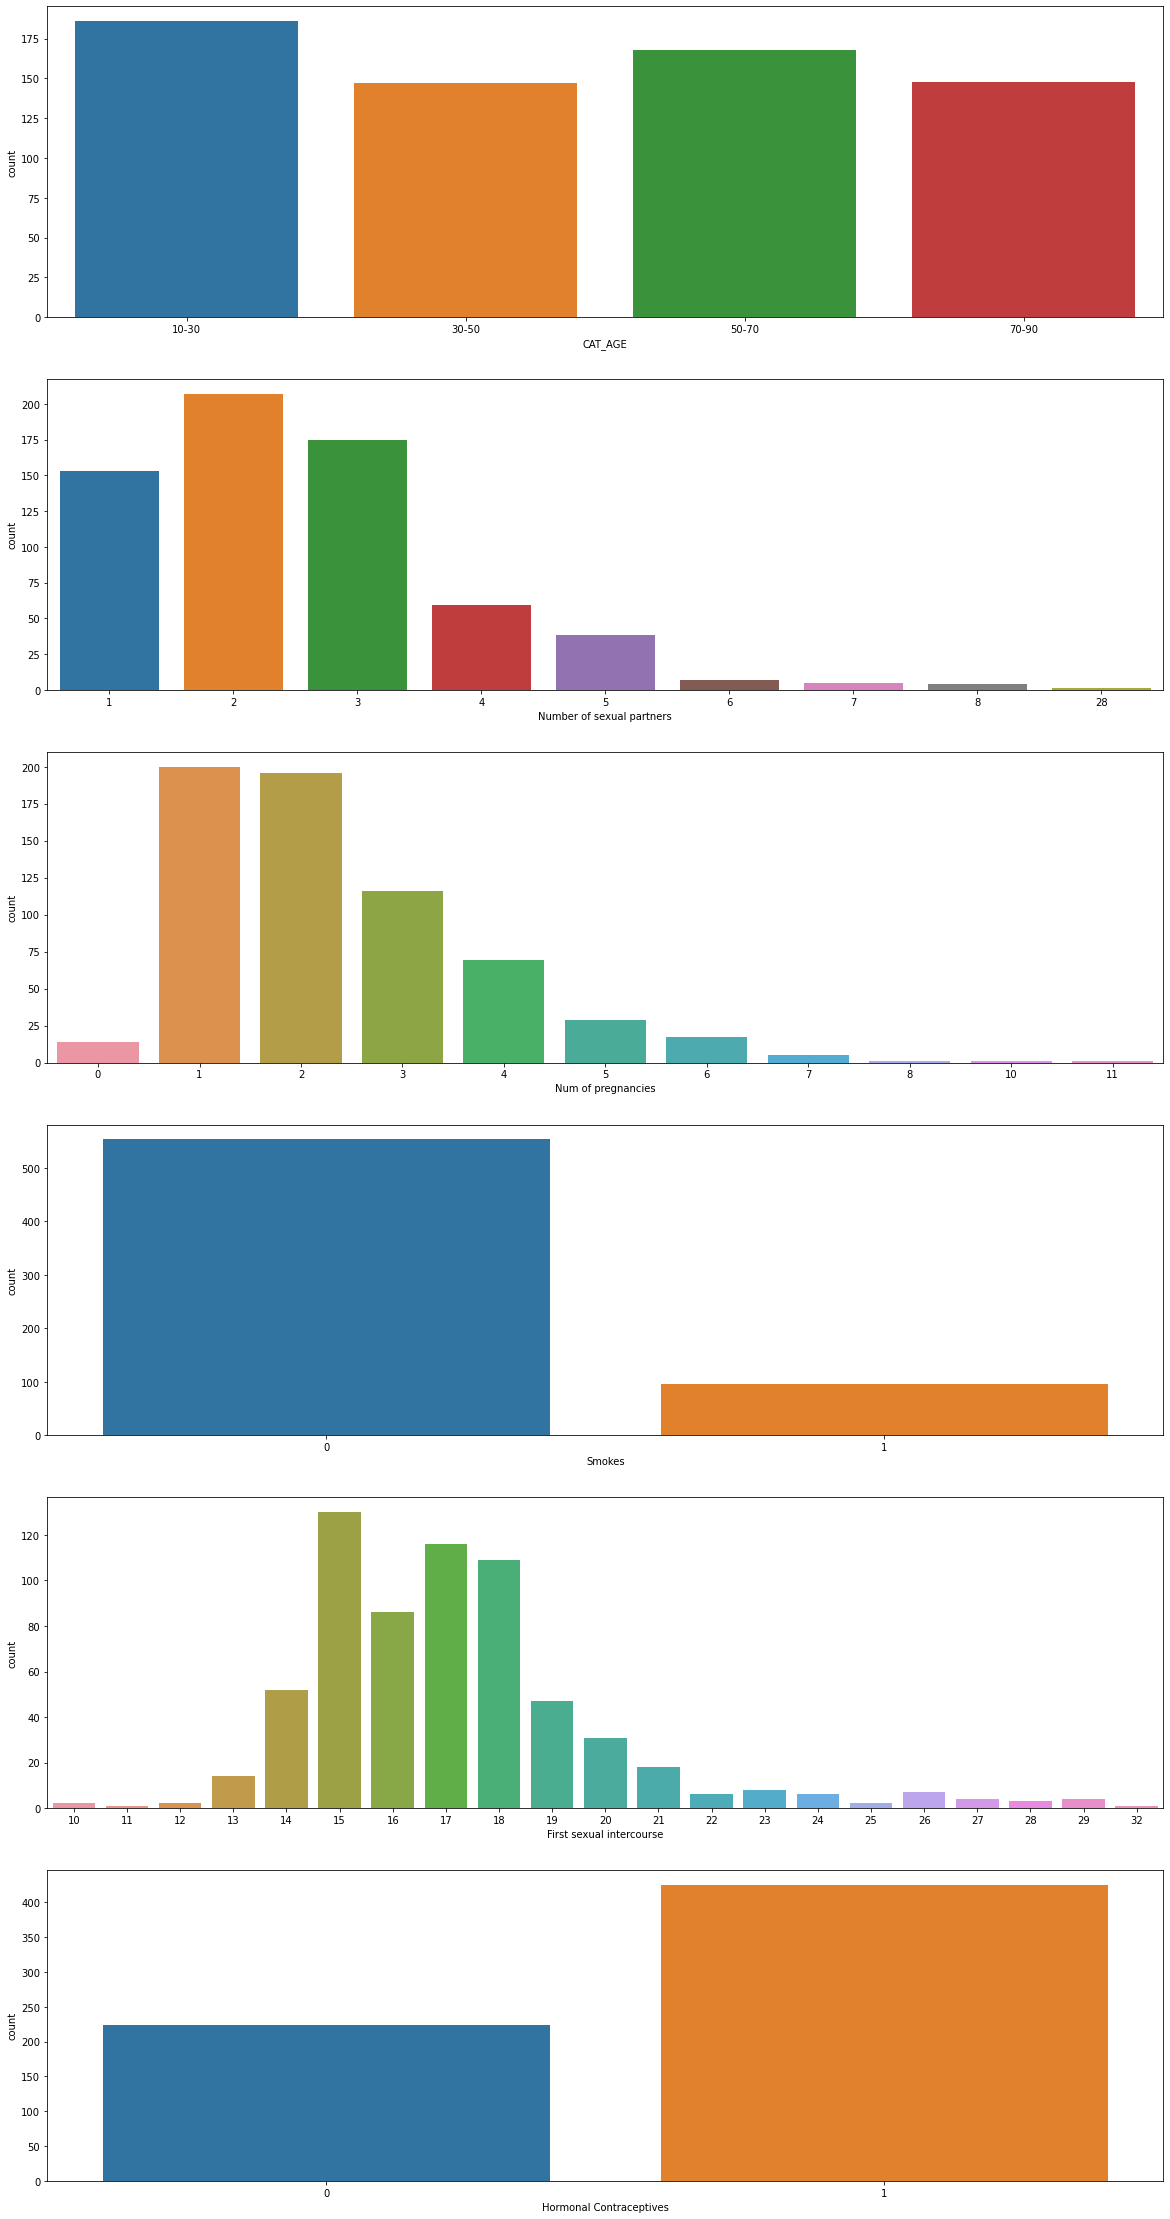

In [24]:
###Viasualizamos los datos numéricos
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,1,figsize=(20,40))
sns.countplot(x='CAT_AGE', data=data_clean, ax=ax1)
sns.countplot(x='Number of sexual partners', data=data_clean, ax=ax2)
sns.countplot(x='Num of pregnancies', data=data_clean, ax=ax3)
sns.countplot(x='Smokes', data=data_clean, ax=ax4)
sns.countplot(x='First sexual intercourse', data=data_clean, ax=ax5)
sns.countplot(x='Hormonal Contraceptives', data=data_clean, ax=ax6)


Text(0.5, 1.0, 'Primer encuentro sexual')

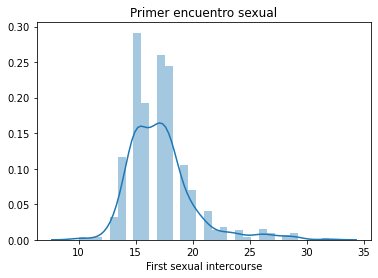

In [25]:
# Observe el rango de esas en que fue el primer encuentro sexual para las pacientes
limit_dist = sns.distplot(data_clean['First sexual intercourse'])
limit_dist.set_title("Primer encuentro sexual")

Text(0.5, 1.0, 'Edad de las pacientes')

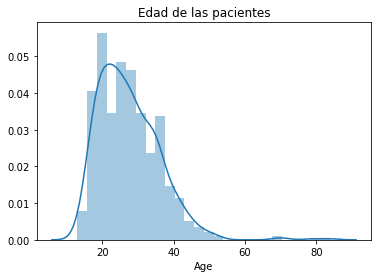

In [26]:
# Observe el rango de edad de las pacientes
limit_dist = sns.distplot(data_clean['Age'])
limit_dist.set_title("Edad de las pacientes")

Text(0.5, 1.0, 'Embarazos')

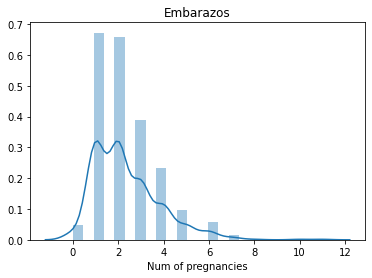

In [27]:
# Observe el rango de embarazos de las pacientes
limit_dist = sns.distplot(data_clean['Num of pregnancies'])
limit_dist.set_title("Embarazos")

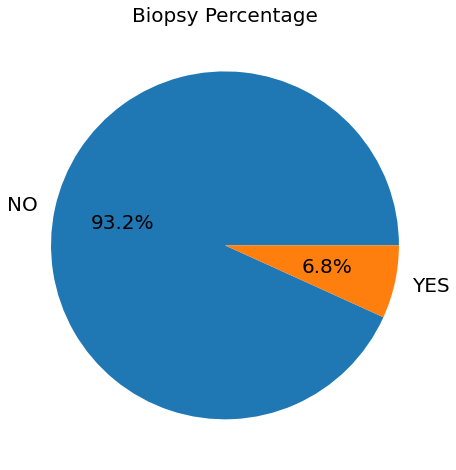

In [28]:
### Visualizamos el comportamiento de Biopsia
impute = data_clean.copy()
plt.figure(figsize = (12,8))
plt.pie(impute['Biopsy'].value_counts(), labels = ['NO', 'YES'], autopct = '%1.1f%%', labeldistance=1.1, textprops = {'fontsize': 20})
plt.title('Biopsy Percentage', fontsize=20)
plt.show()

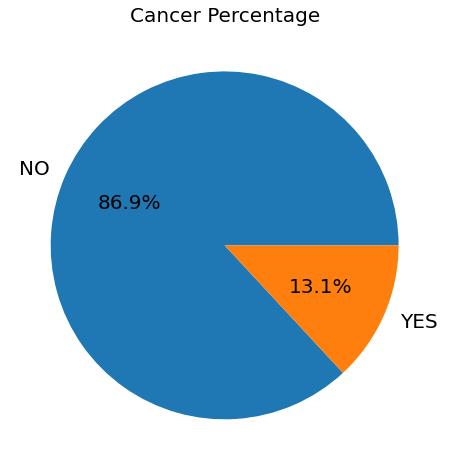

In [29]:
### Visualizamos el % de la población con cáncer
impute = data_clean.copy()
plt.figure(figsize = (12,8))
plt.pie(impute['Cancer'].value_counts(), labels = ['NO', 'YES'], autopct = '%1.1f%%', labeldistance=1.1, textprops = {'fontsize': 20})
plt.title('Cancer Percentage', fontsize=20)
plt.show()

In [30]:
#número de mujeres con cancer según el rango de edad
data_clean.groupby(['Cancer', 'CAT_AGE'])['Cancer'].count()

Cancer  CAT_AGE
0       10-30      156
        30-50      132
        50-70      148
        70-90      128
1       10-30       30
        30-50       15
        50-70       20
        70-90       20
Name: Cancer, dtype: int64

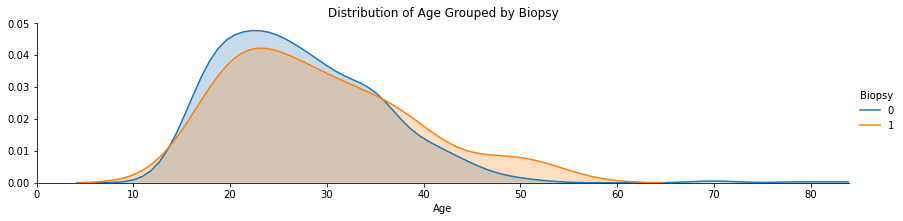

In [31]:
fig = sns.FacetGrid(data_clean, hue='Biopsy', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = data_clean['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Biopsy')
fig.add_legend()

Text(0, 0.5, 'Age')

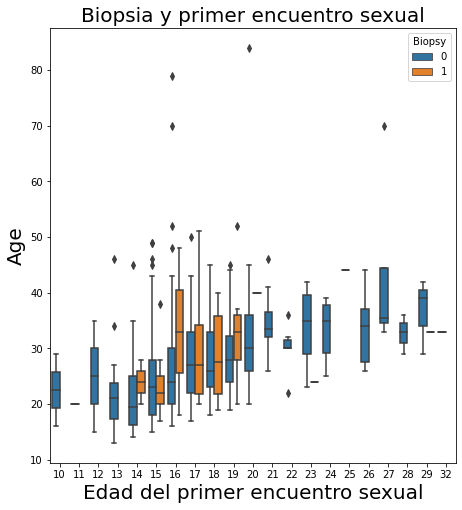

In [32]:
plt.subplots(1,1,figsize=(16,8))
plt.subplot(1,2,1)
a=sns.boxplot(x=data_clean['First sexual intercourse'],y=data_clean['Age'], hue=data_clean['Biopsy'])
a.axes.set_title("Biopsia y primer encuentro sexual",fontsize=20)
a.set_xlabel("Edad del primer encuentro sexual",fontsize=20)
a.set_ylabel("Age",fontsize=20)
###las pacientes entre los 20 y 40 años que iniciaron encuentros sexuales entre los 14 y 20 años 
#tienen más probabilidad de tener cáncer.

Text(0, 0.5, 'Age')

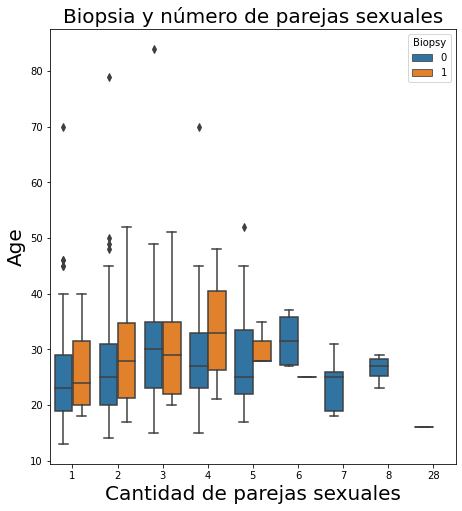

In [33]:
plt.subplots(1,1,figsize=(16,8))
plt.subplot(1,2,1)
a=sns.boxplot(x=data_clean['Number of sexual partners'],y=data_clean['Age'], hue=data_clean['Biopsy'])
a.axes.set_title("Biopsia y número de parejas sexuales",fontsize=20)
a.set_xlabel("Cantidad de parejas sexuales",fontsize=20)
a.set_ylabel("Age",fontsize=20)
###las pacientes entre los 20 y 40 años que tienen ente 2 y 5 parejas sexuales
#tienen más probabilidad de tener cáncer.

In [34]:
#########################Selección de características ########################################################
#creamos una matriz de correlacion
data_clean = data_clean.drop('CAT_AGE', axis=1)
corrMat = data_clean.corr()
print(corrMat)

                                         Age  Number of sexual partners  \
Age                                 1.000000                   0.069040   
Number of sexual partners           0.069040                   1.000000   
First sexual intercourse            0.362495                  -0.161600   
Num of pregnancies                  0.552796                   0.086942   
Smokes                              0.045179                   0.229368   
Smokes (years)                      0.222155                   0.153805   
Smokes (packs/year)                 0.111430                   0.156726   
Hormonal Contraceptives             0.057872                  -0.007431   
Hormonal Contraceptives (years)     0.281059                   0.018456   
IUD                                 0.255668                   0.037229   
IUD (years)                         0.201213                   0.003443   
STDs                               -0.002864                   0.019428   
STDs (number)            

In [35]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649 entries, 0 to 857
Data columns (total 35 columns):
Age                                   649 non-null int64
Number of sexual partners             649 non-null int64
First sexual intercourse              649 non-null int64
Num of pregnancies                    649 non-null int64
Smokes                                649 non-null int64
Smokes (years)                        649 non-null int64
Smokes (packs/year)                   649 non-null int64
Hormonal Contraceptives               649 non-null int64
Hormonal Contraceptives (years)       649 non-null int64
IUD                                   649 non-null int64
IUD (years)                           649 non-null int64
STDs                                  649 non-null int64
STDs (number)                         649 non-null int64
STDs:condylomatosis                   649 non-null int64
STDs:cervical condylomatosis          649 non-null int64
STDs:vaginal condylomatosis           64

In [36]:
#########################MOdelos de predicción#########################################################

## Buscamos la variable dependiente.
df = data_clean
features = df.drop('Biopsy', axis=1)
features = features.drop('Hinselmann', axis=1)
features = features.drop('Schiller', axis=1)
features = features.drop('Citology', axis=1)
features = features.drop('Cancer', axis=1)
depVar = df['Cancer']


In [37]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649 entries, 0 to 857
Data columns (total 30 columns):
Age                                   649 non-null int64
Number of sexual partners             649 non-null int64
First sexual intercourse              649 non-null int64
Num of pregnancies                    649 non-null int64
Smokes                                649 non-null int64
Smokes (years)                        649 non-null int64
Smokes (packs/year)                   649 non-null int64
Hormonal Contraceptives               649 non-null int64
Hormonal Contraceptives (years)       649 non-null int64
IUD                                   649 non-null int64
IUD (years)                           649 non-null int64
STDs                                  649 non-null int64
STDs (number)                         649 non-null int64
STDs:condylomatosis                   649 non-null int64
STDs:cervical condylomatosis          649 non-null int64
STDs:vaginal condylomatosis           64

In [38]:
# Dividimos el conjunto de datos de validación y entrenamiento
from sklearn.model_selection import train_test_split
test_size = 0.30
seed = 1106
X_train, X_validation, Y_train, Y_validation = train_test_split(features, depVar, test_size=test_size, random_state=seed, shuffle=True)


In [39]:
#Construir los modelos
#utilizaremos 10-fold cross validation para estimar la precisión del modelo.

# Algoritmos de comprobación
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('GBM',GradientBoostingClassifier()))
models.append(('SVM', SVC()))

In [40]:
#Evaluación de Modelos
from sklearn.model_selection import StratifiedKFold
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

RF: 0.870048 (0.023041)
GBM: 0.867923 (0.028982)
SVM: 0.876715 (0.009996)


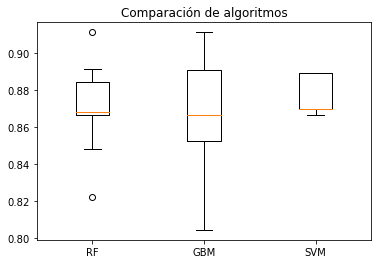

In [41]:
#comparar algoritmos
from matplotlib import pyplot
pyplot.boxplot(results, labels=names)
pyplot.title('Comparación de algoritmos')
pyplot.show()

In [45]:
######Tenemos dos modelos candidatos RF y GBM probaremos los resultados de predicción con ambos

#Hacer predicciones con RF sobre el conjunto de datos de validación
model =RandomForestClassifier()
clf= model.fit(X_train, Y_train)
predictions =clf.predict(X_validation)
##impresión de resultados
model_score = clf.score(X_validation, Y_validation)
print ("Model Score %.2f \n" % (model_score))
##Exactitud del modelo
exactitud = accuracy_score(Y_validation, predictions)
precision = precision_score(Y_validation, predictions)
sensibilidad = recall_score(Y_validation, predictions)

print('Exactitud: %.3f' % exactitud)
print('Precision: %.3f' % precision)
print('Sensibilidad: %.3f' % sensibilidad)


Model Score 0.85 

Exactitud: 0.851
Precision: 0.500
Sensibilidad: 0.034


In [46]:
#Hacer predicciones con GBM sobre el conjunto de datos de validación
model = GradientBoostingClassifier()
clf= model.fit(X_train, Y_train)
predictions =clf.predict(X_validation)
##impresión de resultados
model_score = clf.score(X_validation, Y_validation)
print ("Model Score %.2f \n" % (model_score))
##Exactitud del modelo
exactitud = accuracy_score(Y_validation, predictions)
precision = precision_score(Y_validation, predictions)
sensibilidad = recall_score(Y_validation, predictions)

print('Exactitud: %.3f' % exactitud)
print('Precision: %.3f' % precision)
print('Sensibilidad: %.3f' % sensibilidad)


Model Score 0.84 

Exactitud: 0.836
Precision: 0.286
Sensibilidad: 0.069
